# eXtreme Gradient Boosting on Pima Indians Diabetes Dataset

**Import the required Libraries**

In [1]:
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sb 
import numpy as np

**Read the data set**

In [2]:
diabetesDataSet = pd.read_csv("diabetes.csv")
diabetesDataSet.head(3)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1


In [3]:
diabetesDataSet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
Pregnancies                 768 non-null int64
Glucose                     768 non-null int64
BloodPressure               768 non-null int64
SkinThickness               768 non-null int64
Insulin                     768 non-null int64
BMI                         768 non-null float64
DiabetesPedigreeFunction    768 non-null float64
Age                         768 non-null int64
Outcome                     768 non-null int64
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


**Data preprocessing**

In [4]:
# check for missing values in all the columns
diabetesDataSet.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

**Identify the unique elements of the categorical data variable "Outcome"**

In [5]:
print(diabetesDataSet['Outcome'].unique())

[1 0]


**Count the number of unique elements of the categorical data variable "Outcome"**

In [6]:
diabetesDataSet['Outcome'].value_counts()      # where, 0===> diabetes not diagnosed and 1 ===> diabetes diagnosed

0    500
1    268
Name: Outcome, dtype: int64

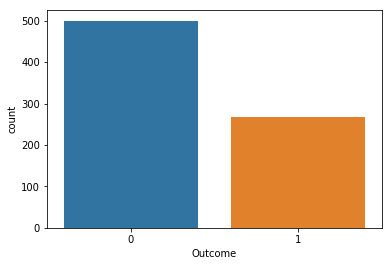

In [7]:
# graphical plot of the number of elements in poisonous and edible class.
sb.countplot(diabetesDataSet['Outcome'], label = "Count")

**Exploratory Data Analysis (EDA)**

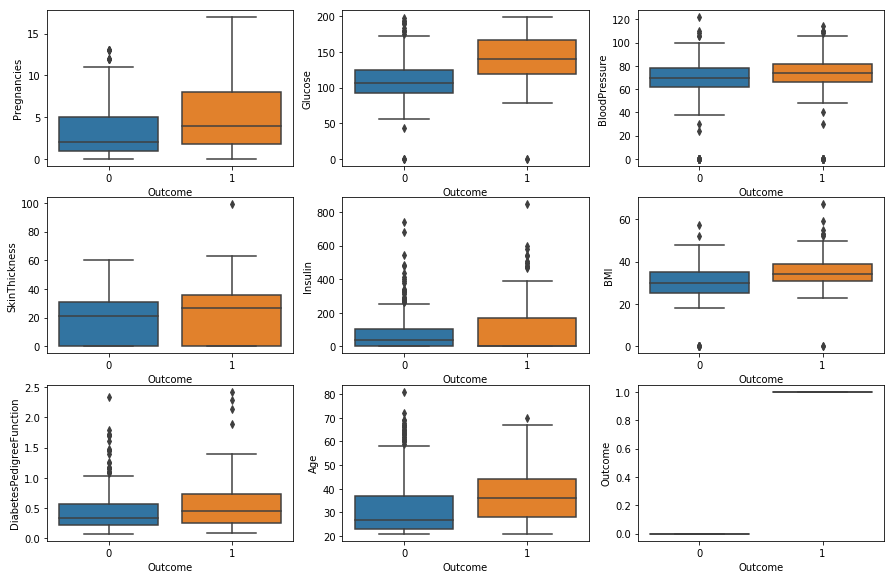

In [8]:
plt.figure(figsize=(15,27))
j= 1
for columns in diabetesDataSet.columns:
    plt.subplot(8,3,j)
    sb.boxplot(diabetesDataSet['Outcome'],diabetesDataSet[columns])
    plt.xlabel("Outcome")
    plt.ylabel("%s"%columns)
    j = j +1
plt.show()

**Correlation matrix**

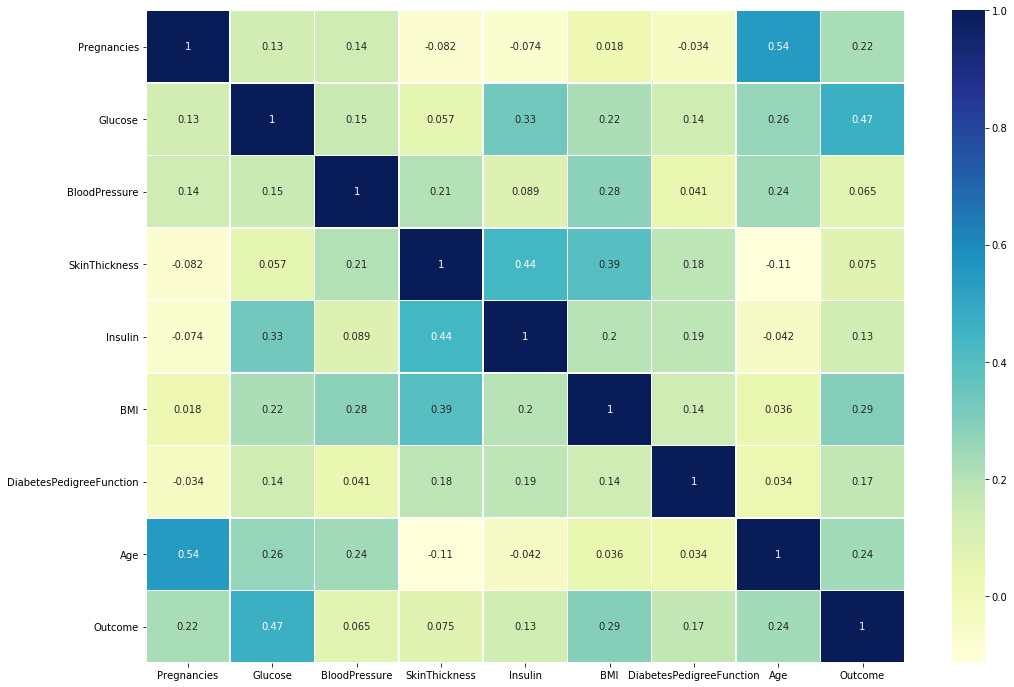

In [9]:
# check for highest feature correlation with the target variable
diabetesCorrelationMatrix=diabetesDataSet.corr()
plt.figure(figsize=(17,12)) 
sb.heatmap(diabetesCorrelationMatrix, annot=True,linewidths=.5,cmap="YlGnBu")

**Prepare the data for sampling**

In [10]:
X = diabetesDataSet.drop("Outcome",axis = 1)
Y = diabetesDataSet["Outcome"]

**Split the data into training and testing sets**

In [11]:
from sklearn.model_selection import train_test_split

# splits the training and test data set in 80% : 20%
# assign random_state to any value.This ensures consistency.
xtrain, xtest, ytrain, ytest = train_test_split(X, Y, test_size = 0.2, random_state=40)

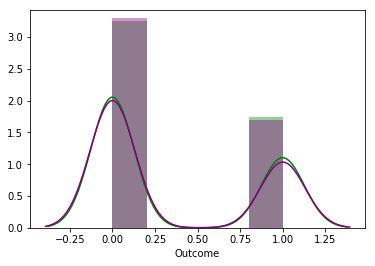

In [12]:
#check if the sampling done is good or bad

sb.distplot(Y,color = "green")
sb.distplot(ytrain,color = "purple")

**Observation : The sampling done is good.**

# eXtreme Gradient Boosting Classifier

**Create a dictionary of parameters to be tuned **

In [13]:
tp = {"n_estimators":range(2,50)}

**Create the model using xgboost **

**Note** : 
*You can install python libraries like xgboost on your system using the below command on command* :  **conda install -c conda-forge xgboost**

In [14]:
import xgboost as xgb
xgbc = xgb.XGBClassifier(random_state = 30)

**Find the best value of tuning parameter to reduce the model error using cross validation**

In [58]:
from sklearn.model_selection import GridSearchCV
cv = GridSearchCV(xgbc,tp,scoring="accuracy",cv=4)
cvmodel = cv.fit(xtrain,ytrain)
xgbcBestParams=cvmodel.best_params_
print("The best parameters for eXtreme Gradient Boosting Classifier are %s  "%xgbcBestParams)

The best parameters for eXtreme Gradient Boosting Classifier are {'n_estimators': 38}  


In [59]:
xgbc = xgb.XGBClassifier(n_estimators=38,learning_rate =0.01,random_state = 30)
modeleXtremeGradientBoostingClassifier=xgbc.fit(xtrain,ytrain)

**Build Predictions**

In [60]:
predeXtremeGradientBoostingClassifier=modeleXtremeGradientBoostingClassifier.predict(xtest)

In [61]:
ytest.value_counts()

0    95
1    59
Name: Outcome, dtype: int64

**Confusion matrix and Accuracy score for eXtreme Gradient Boosting Classification**

The accuracy score for eXtreme Gradient Boosting Classification is 0.79


(array([0.5, 1.5]), <a list of 2 Text xticklabel objects>)

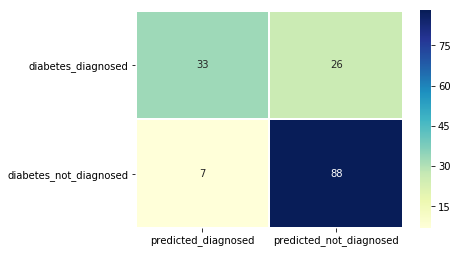

In [62]:
from sklearn.metrics import accuracy_score,confusion_matrix
print("The accuracy score for eXtreme Gradient Boosting Classification is %.2f"%accuracy_score(ytest,predeXtremeGradientBoostingClassifier))

cmeXtremeGradientBoostingClassifier=np.array(confusion_matrix(ytest,predeXtremeGradientBoostingClassifier,labels = [1,0]))
cmeXtremeGradientBoostingClassifier = pd.DataFrame(cmeXtremeGradientBoostingClassifier,index= ["diabetes_diagnosed","diabetes_not_diagnosed"],columns= ["predicted_diagnosed","predicted_not_diagnosed"])

sb.heatmap(cmeXtremeGradientBoostingClassifier, annot=True, fmt="d",linewidths=1.5,cmap="YlGnBu")
plt.xticks(rotation=0) 


# Gradient Boosting Classifier

In [63]:
from sklearn.ensemble import GradientBoostingClassifier 

gbc = GradientBoostingClassifier(n_estimators = 38,learning_rate =0.01,random_state = 30)
modelGradientBoostingClassifier=gbc.fit(xtrain,ytrain)

**Build Predictions**

In [64]:
predGradientBoostingClassifier=modelGradientBoostingClassifier.predict(xtest)

In [65]:
ytest.value_counts()

0    95
1    59
Name: Outcome, dtype: int64

**Confusion matrix and Accuracy score for Gradient Boosting Classification**

The accuracy score for Gradient Boosting Classification is 0.65


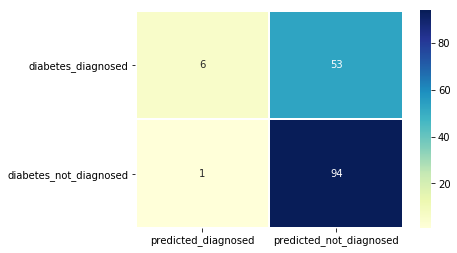

In [66]:
from sklearn.metrics import accuracy_score,confusion_matrix
print("The accuracy score for Gradient Boosting Classification is %.2f"%accuracy_score(ytest,predGradientBoostingClassifier))

cmGradientBoostingClassifier=np.array(confusion_matrix(ytest,predGradientBoostingClassifier,labels = [1,0]))

cmGradientBoostingClassifier = pd.DataFrame(cmGradientBoostingClassifier,index= ["diabetes_diagnosed","diabetes_not_diagnosed"],columns= ["predicted_diagnosed","predicted_not_diagnosed"])
sb.heatmap(cmGradientBoostingClassifier, annot=True, fmt="d",linewidths=1.5,cmap="YlGnBu")

**Observation :** The accuracy score for eXtreme Gradient Boosting Classification(0.79) is higher than that of Gradient Boosting Classification(0.65) for the same value of (random_state(30),n_estimators(38) and learning rate(0.01))